# Risk Level Distribution Visualization
This notebook visualizes the distribution of GDPR risk levels from enriched healthcare log data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load enriched data
df = pd.read_csv('../data/healthcare_logs.csv')

# Check if 'risk_level' exists, else reconstruct features
if 'risk_level' not in df.columns:
    eu_countries = ['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI',
                   'FR', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT',
                   'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK']
    df['non_eu_flag'] = ~df['Country'].isin(eu_countries)
    df['consent_violation_flag'] = df['ConsentStatus'] == False
    df['timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    df['hour'] = df['timestamp'].dt.hour
    df['admin_access_outside_hours'] = (
        (df['Role'] == 'admin') & ((df['hour'] < 6) | (df['hour'] > 22))
    )
    df['risk_score'] = (
        df['non_eu_flag'].astype(int) +
        df['consent_violation_flag'].astype(int) +
        df['admin_access_outside_hours'].astype(int)
    )
    df['risk_level'] = df['risk_score'].apply(lambda x: 'High' if x >= 2 else ('Medium' if x == 1 else 'Low'))

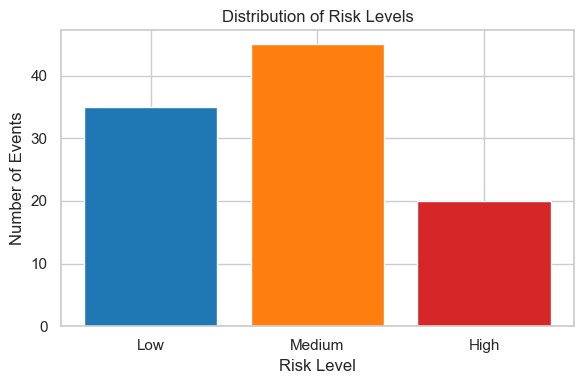

In [2]:
# Risk Level Distribution
sns.set(style='whitegrid')
plt.figure(figsize=(6, 4))
color_map = {'Low': '#1f77b4', 'Medium': '#ff7f0e', 'High': '#d62728'}
order = ['Low', 'Medium', 'High']
counts = df['risk_level'].value_counts().reindex(order)
plt.bar(counts.index, counts.values, color=[color_map[x] for x in counts.index])
plt.title('Distribution of Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()